# Upgrade pandas and sklearn packages to latest versions

In [2]:
# Upgrade pandas to latest version
#!pip install pandas --upgrade
# Upgrade scikit-learn to latest version
#!pip install sklearn --upgrade

# Import packages and verify versions

In [3]:
import pandas as pd
import sklearn
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The pandas version is 0.20.3.
The scikit-learn version is 0.18.2.


# Load data

In [4]:
url_customers = 'https://ibm.box.com/shared/static/g1dawssthj3nab1tnfp9nk1eovj2otsb.csv'
url_trips = 'https://ibm.box.com/shared/static/o651sl0i85zltfyrfqaqjnbp7dg53bem.csv'

In [5]:
customers = pd.read_table(url_customers,sep=',')
trips = pd.read_table(url_trips,sep=',')

In [6]:
customers.columns = [col.replace(' ', '') for col in customers.columns]
trips.columns = [col.replace(' ', '') for col in trips.columns]

In [7]:
pd.set_option('display.max_columns', None)
customers.head()

,CUST_ID,CustomerName,CustomerEmail,CustomerCountry,CustomerContinent,CustomerAddress,CustomerCity,CustomerState,CustomerPostalCode,CustomerPhone,Gender,Age,MaritalStatus,Profession,EducationLevel,Income,MembersinHousehold,PetOwner,MonthBirth,MonthNumofBirth,OwnHome,RespondedtoPromo,SalesRep_ID,AgeBand,NumberofTrips
0,1,Carla Abney,Carla.Abney@cox.net,USA,NaN,71 S Newtown St,Boston,MA,2210,617-203-6529,F,44,S,Teacher,College,43225.2,1,Yes,December,12,No,No,5,43 to 53,2
1,2,Florencia Abney,Florencia.Abney@cox.net,USA,NaN,4 Bloomfield Ave #5,Manchester,NH,3101,603-364-5269,F,21,U,Pharmacist,Post College,123212.4,2,Yes,January,1,No,No,5,21_to 31,1
2,3,Gilma Abney,Gilma.Abney@cox.net,USA,NaN,841 N Monroe St,Boston,MA,2210,617-862-3297,F,28,U,Teacher,College,51082.8,2,No,May,5,Yes,No,6,21_to 31,1
3,4,Joaquin Abney,Joaquin.Abney@gmail.com,USA,NaN,5094 Poway Rd,Boston,MA,2210,617-875-9701,M,47,M,Engineer,College,90913.2,3,No,July,7,Yes,No,6,43 to 53,1
4,5,King Abney,King.Abney@gmail.com,USA,NaN,43 Winnetka Ave,Boston,MA,2210,617-521-9619,M,26,U,Engineer,Post College,107592.0,2,Yes,June,6,Yes,No,9,21_to 31,1


In [8]:
trips.head()

,BookingID,CUST_ID,TravelingParty,TripDelay,DestinationAirportCode,DestinationContinent,DestinationCountry,DestinationCity,LengthofTrip,DestinationType,BookingType,Classification,MultiDestination,Origin,PackageType,PaymentPlan,TripCostPerPersonPerDay,BookingDate,TripStartDate,DaysBetweenBookingandTrip,TotalCost,BookingYear,BookingMonth,BookingDay,TripYear,TripMonth,TripDay,DayofWeekTripStart
0,30238,23.0,2,No,HND,Asia,Japan,Tokyo,12,Hotel,Office,Premium,N,BDL,Outdoors,N,439.50,10/15/14,3/13/15,149,10548.00,2014,10,15,2015,3,13,6
1,44890,1.0,2,Yes,AKL,Aust,New Zealand,Auckland,6,Hotel,Online,Premium,Y,BOS,Outdoors,N,425.00,2/23/14,12/12/14,292,5100.00,2014,2,23,2014,12,12,6
2,29926,25.0,3,No,HNL,NaN,USA,Honolulu,4,Timeshare,Office,Premium,N,MHT,Outdoors,N,316.66,6/27/14,1/12/15,199,3799.92,2014,6,27,2015,1,12,2
3,14835,2.0,7,No,LAS,NaN,USA,Las Vegas,7,Resort,Phone,Premium,N,BOS,Shopping,N,267.84,10/30/14,8/20/15,294,13124.16,2014,10,30,2015,8,20,5
4,47200,1.0,1,No,DCA,NaN,USA,Washington DC,5,Resort,Online,Luxury,N,BOS,Outdoors,Y,559.98,11/5/14,12/25/14,50,2799.90,2014,11,5,2014,12,25,5


In [9]:
print('Number of rows in customers = {}'.format(customers.CUST_ID.count()))
print('Number of rows in trips = {}'.format(trips.CUST_ID.count()))

Number of rows in customers = 15000
Number of rows in trips = 23042


# Join Data

In [10]:
joined = trips.join(customers.set_index('CUST_ID'), on='CUST_ID', how='inner').reset_index(drop=True)

In [11]:
print('Number of rows in joined = {}'.format(joined.CUST_ID.count()))
joined.head()

Number of rows in joined = 23042


,BookingID,CUST_ID,TravelingParty,TripDelay,DestinationAirportCode,DestinationContinent,DestinationCountry,DestinationCity,LengthofTrip,DestinationType,BookingType,Classification,MultiDestination,Origin,PackageType,PaymentPlan,TripCostPerPersonPerDay,BookingDate,TripStartDate,DaysBetweenBookingandTrip,TotalCost,BookingYear,BookingMonth,BookingDay,TripYear,TripMonth,TripDay,DayofWeekTripStart,CustomerName,CustomerEmail,CustomerCountry,CustomerContinent,CustomerAddress,CustomerCity,CustomerState,CustomerPostalCode,CustomerPhone,Gender,Age,MaritalStatus,Profession,EducationLevel,Income,MembersinHousehold,PetOwner,MonthBirth,MonthNumofBirth,OwnHome,RespondedtoPromo,SalesRep_ID,AgeBand,NumberofTrips
0,30238,23,2,No,HND,Asia,Japan,Tokyo,12,Hotel,Office,Premium,N,BDL,Outdoors,N,439.50,10/15/14,3/13/15,149,10548.00,2014,10,15,2015,3,13,6,Adellea Addams,Adellea.Addams@yahoo.com,USA,NaN,15 Ludlow Ave #156,New York,NY,10001,212-480-9209,F,48,S,Pharmacist,Post College,112555.2,1,No,October,10,Yes,No,2,43 to 53,2
1,25243,23,5,No,BGI,Caribbean,Barbados,Seawell,11,Resort,Online,Luxury,N,MHT,Family,N,712.80,7/16/15,11/2/15,109,39204.00,2015,7,16,2015,11,2,2,Adellea Addams,Adellea.Addams@yahoo.com,USA,NaN,15 Ludlow Ave #156,New York,NY,10001,212-480-9209,F,48,S,Pharmacist,Post College,112555.2,1,No,October,10,Yes,No,2,43 to 53,2
2,44890,1,2,Yes,AKL,Aust,New Zealand,Auckland,6,Hotel,Online,Premium,Y,BOS,Outdoors,N,425.00,2/23/14,12/12/14,292,5100.00,2014,2,23,2014,12,12,6,Carla Abney,Carla.Abney@cox.net,USA,NaN,71 S Newtown St,Boston,MA,2210,617-203-6529,F,44,S,Teacher,College,43225.2,1,Yes,December,12,No,No,5,43 to 53,2
3,47200,1,1,No,DCA,NaN,USA,Washington DC,5,Resort,Online,Luxury,N,BOS,Outdoors,Y,559.98,11/5/14,12/25/14,50,2799.90,2014,11,5,2014,12,25,5,Carla Abney,Carla.Abney@cox.net,USA,NaN,71 S Newtown St,Boston,MA,2210,617-203-6529,F,44,S,Teacher,College,43225.2,1,Yes,December,12,No,No,5,43 to 53,2
4,29926,25,3,No,HNL,NaN,USA,Honolulu,4,Timeshare,Office,Premium,N,MHT,Outdoors,N,316.66,6/27/14,1/12/15,199,3799.92,2014,6,27,2015,1,12,2,Adria Addams,Adria.Addams@cox.net,USA,NaN,1 E Gabilan St,Boston,MA,2210,617-356-9602,F,32,U,Nursing,College,51396.0,2,No,June,6,No,No,4,32 to 42,2


# Drop null values

In [12]:
joined.drop('CustomerContinent', axis=1, inplace=True)
joined.drop('DestinationContinent', axis=1, inplace=True)
joined = joined.dropna(axis=0)
print('Number of rows in joined = {}'.format(joined.CUST_ID.count()))

Number of rows in joined = 23042


# Create a Return Customer Label

In [13]:
joined['ReturnCustomer'] = joined['NumberofTrips'].where((joined['NumberofTrips'] >= 2), 0)
joined['ReturnCustomer'] = joined['ReturnCustomer'].where((joined['ReturnCustomer'] ==0), 1)

In [14]:
joined[['NumberofTrips', 'ReturnCustomer']].sample(n=10, random_state=1)

,NumberofTrips,ReturnCustomer
11823,1,0
13387,2,1
5246,2,1
22908,1,0
16862,2,1
14647,3,1
8871,1,0
20641,1,0
20473,1,0
12051,3,1


In [15]:
# Confirm labels are not imbalanced
joined['ReturnCustomer'].value_counts()

1    13079
0     9963
Name: ReturnCustomer, dtype: int64

# Bin Income

In [16]:
print('Minimum Income = ${0:.2f}'.format(joined['Income'].min()))
print('Maximum Income = ${0:.2f}'.format(joined['Income'].max()))

Minimum Income = $22149.60
Maximum Income = $155852.40


In [17]:
bins = [22149, 50000, 75000, 100000, 130000, 155853]
binNames = [1, 2, 3, 4, 5]
joined['IncomeBin'] = pd.cut(joined['Income'], bins, labels=binNames)
print('Number of rows in joined = {}'.format(joined.CUST_ID.count()))
joined[['Income', 'IncomeBin']].sample(n=10, random_state=0)

Number of rows in joined = 23042


,Income,IncomeBin
14429,89054.4,3
16440,99667.2,3
4832,49196.4,1
19188,40300.8,1
22712,80214.0,3
4682,100389.6,4
15622,47062.8,1
6465,148550.4,5
1628,87871.2,3
9958,70168.8,2


# Target only Package Types of Family, Outdoors, and Sightseeting

In [18]:
joined = joined[(joined['PackageType']=='Outdoors')|(joined['PackageType']=='Family')|(joined['PackageType']=='Sightseeing')]
joined[['BookingID','PackageType']].sample(n=10, random_state=1)

,BookingID,PackageType
5887,44174,Family
21893,47451,Family
19767,7161,Outdoors
1188,54380,Sightseeing
881,47497,Family
4889,9650,Sightseeing
14253,10479,Outdoors
14292,56028,Sightseeing
10597,65347,Outdoors
21429,59885,Sightseeing


# Drop Columns not being used as Features

In [19]:
dropCols = (['BookingID', 'CUST_ID', 'BookingDate', 'TripStartDate', 'CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'Age', 
             'NumberofTrips'])
joined.drop(dropCols, axis=1, inplace=True)

# Convert numeric data to integer (some numeric columns were inferred as float64)

In [20]:
joinedColNames = joined.columns.values.tolist()
intList = []
floatCols = []
for col in joinedColNames:
    if joined[col].dtypes == 'float64':
        floatCols.append(col)
        intList.append('int')
# Create a dictionary that will be used to set the numeric columns to integer type
intDict = dict(zip(floatCols, intList))
intDict

{'Income': 'int', 'TotalCost': 'int', 'TripCostPerPersonPerDay': 'int'}

In [21]:
# Convert the numeric columns to integer
joined = joined.astype(intDict)
# All numeric data is now int64

# Encode the string data

In [22]:
joined.columns.values

array(['TravelingParty', 'TripDelay', 'DestinationAirportCode',
       'DestinationCountry', 'DestinationCity', 'LengthofTrip',
       'DestinationType', 'BookingType', 'Classification',
       'MultiDestination', 'Origin', 'PackageType', 'PaymentPlan',
       'TripCostPerPersonPerDay', 'DaysBetweenBookingandTrip', 'TotalCost',
       'BookingYear', 'BookingMonth', 'BookingDay', 'TripYear',
       'TripMonth', 'TripDay', 'DayofWeekTripStart', 'CustomerCountry',
       'CustomerCity', 'CustomerState', 'CustomerPostalCode', 'Gender',
       'MaritalStatus', 'Profession', 'EducationLevel', 'Income',
       'MembersinHousehold', 'PetOwner', 'MonthBirth', 'MonthNumofBirth',
       'OwnHome', 'RespondedtoPromo', 'SalesRep_ID', 'AgeBand',
       'ReturnCustomer', 'IncomeBin'], dtype=object)

In [23]:
# Import LabelEncoder and initialize it
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
# Encode the entire DataFrame before splitting the data into training and test sets
joinedColNames = joined.columns.values.tolist()
for col in joinedColNames:
    # Encode only the categorical columns
    if joined[col].dtypes == 'object':
        lenc.fit(joined[col])
        joined[col+'.t']=lenc.transform(joined[col])
        joined = joined.drop(col, axis = 1)
joined.rename(columns=lambda x: x.replace('.t', ''), inplace=True)

# Scale the features

In [24]:
joinedColFeatures = joined.columns.values.tolist()
joinedColFeatures.remove('ReturnCustomer')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
joined[joinedColFeatures] = scaler.fit_transform(joined[joinedColFeatures])

# Prepare the data for machine learning

In [26]:
# Create features and label dataframes
X = joined.drop('ReturnCustomer', axis = 1)
y = joined.ReturnCustomer

In [27]:
# Sample the indexed DataFrame
X.sample(n=5, random_state=2)

,TravelingParty,LengthofTrip,TripCostPerPersonPerDay,DaysBetweenBookingandTrip,TotalCost,BookingYear,BookingMonth,BookingDay,TripYear,TripMonth,TripDay,DayofWeekTripStart,CustomerPostalCode,Income,MembersinHousehold,MonthNumofBirth,SalesRep_ID,IncomeBin,TripDelay,DestinationAirportCode,DestinationCountry,DestinationCity,DestinationType,BookingType,Classification,MultiDestination,Origin,PackageType,PaymentPlan,CustomerCountry,CustomerCity,CustomerState,Gender,MaritalStatus,Profession,EducationLevel,PetOwner,MonthBirth,OwnHome,RespondedtoPromo,AgeBand
1172,0.857143,0.8,0.039246,0.869841,0.074455,0.5,0.545455,0.166667,1.0,0.363636,0.633333,0.833333,0.627776,0.543653,0.8,0.727273,0.285714,0.50,0.0,0.800000,1.0,0.466667,1.000000,0.5,1.0,1.0,0.428571,0.0,1.0,0.0,0.8,0.6,1.0,0.5,0.692308,0.0,0.0,1.000000,1.0,1.0,0.00
2305,0.285714,0.2,0.054945,0.638095,0.015577,0.0,0.818182,0.066667,0.5,0.454545,0.166667,1.000000,1.000000,0.174790,0.6,0.454545,0.571429,0.00,0.0,0.000000,0.6,0.000000,1.000000,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,0.6,0.8,0.0,0.5,0.230769,1.0,0.0,0.545455,1.0,0.0,0.25
17709,0.428571,0.4,0.193093,0.053968,0.072210,0.5,0.545455,0.966667,0.5,0.727273,0.966667,0.500000,0.000000,0.571221,0.8,0.272727,0.214286,0.50,1.0,0.866667,0.9,0.400000,0.333333,0.5,0.5,0.0,0.142857,0.5,0.0,0.0,0.0,0.2,1.0,0.0,0.230769,1.0,1.0,0.000000,0.0,0.0,0.25
12158,0.142857,0.8,0.171900,0.479365,0.051375,0.5,0.636364,0.133333,1.0,0.090909,0.533333,0.500000,0.499422,0.518246,0.0,0.909091,0.285714,0.50,0.0,0.066667,0.0,0.866667,0.666667,0.5,0.5,1.0,0.000000,1.0,0.0,0.0,0.2,0.0,0.0,0.5,0.923077,0.0,0.0,0.818182,1.0,1.0,0.25
14548,0.000000,0.2,0.740188,0.692063,0.040802,0.5,0.909091,0.233333,1.0,0.545455,0.900000,0.666667,0.627776,0.702445,0.0,0.909091,0.142857,0.75,1.0,0.133333,0.3,0.666667,1.000000,0.5,0.0,0.0,0.285714,1.0,0.0,0.0,0.8,0.6,1.0,0.5,0.076923,0.0,1.0,0.818182,1.0,0.0,0.50


# Create training and test datasets¶

In [28]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

In [29]:
# Show the number of rows in each data set
print('Number of rows in X_train is {}.'.format(X_train.shape[0]))
print('Number of rows in X_test is {}.'.format(X_test.shape[0]))
print('Number of rows in y_train is {}.'.format(y_train.shape[0]))
print('Number of rows in y_test is {}.'.format(y_test.shape[0]))

Number of rows in X_train is 11408.
Number of rows in X_test is 1268.
Number of rows in y_train is 11408.
Number of rows in y_test is 1268.


# Train the model

In [30]:
#import required modules from the scikit-learn metrics package
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [31]:
# setup for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Check model accuracy

In [33]:
# Check the Logistic Regression model accuracy
y_pred = lreg.predict(X_test)
print('Accuracy score for Logistic Regression = {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy score for Logistic Regression = 0.74


In [34]:
# Print the confusion matrix for Logistic Regression analysis
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[360 203]
 [122 583]]


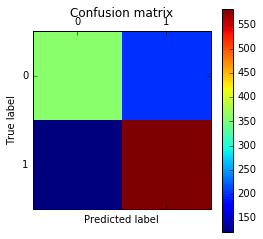

In [35]:
# Plot the confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

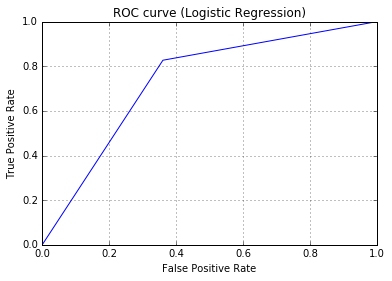

In [36]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [37]:
# Print out AUC, the percentage of the ROC plot that is underneath the curve
print('AUC using Logistic Regression = {:.2f}'.format(roc_auc_score(y_test, y_pred)))

AUC using Logistic Regression = 0.73


In [38]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation for Logistic Regression
lreg_avg_cross_val_score = cross_val_score(lreg, X, y, cv=10, scoring='roc_auc').mean()
print('Cross-validated AUC for Logistic Regression = {:.2f}'.format(lreg_avg_cross_val_score))

Cross-validated AUC for Logistic Regression = 0.81


# Hyperparamater Tuning¶

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# create lists of the parameter values that should be searched
# The penalty parameter is used to specify the norm used in the penalization
penaltyList = ['l1', 'l2']
#The C parameter is the inverse of regularization strength, must be a positive float, smaller values specify stronger regularization
Crange = [float(i)/10 for i in (list(range(1,10,1)))]
#Created a range of positive, float C values to search

In [41]:
# create a parameter grid by mapping the parameter names to the values/list that should be searched
param_grid = dict(penalty = penaltyList, C = Crange)
print(param_grid)

{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'penalty': ['l1', 'l2']}


In [42]:
# instantiate and fit the grid
grid = GridSearchCV(lreg, param_grid, cv=3, scoring='roc_auc')
grid.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [43]:
# examine the best model
print('Best AUC for Logistic Regression = {:.2f}'.format(grid.best_score_))
print('')
print('Parameters for Best AUC for Logistic Regression = {}'.format(grid.best_params_))
print('')
print('Full list of paramemters for best estimator for Logistic Regression:\n {}'.format(grid.best_estimator_))

Best AUC for Logistic Regression = 0.81

Parameters for Best AUC for Logistic Regression = {'C': 0.1, 'penalty': 'l1'}

Full list of paramemters for best estimator for Logistic Regression:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Voting Ensemble
### May take a number of minutes to run

In [44]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [45]:
# define the underlying models
estimators = []
lrModel = LogisticRegression()
estimators.append(('lr', lrModel))
dtcModel = DecisionTreeClassifier()
estimators.append(('dtc', dtcModel))
svcModel = SVC(probability=True)
estimators.append(('svc', svcModel))
# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft')
kfold = KFold(n_splits=3, random_state=0)
votingResults = cross_val_score(ensemble, X, y, cv=kfold)
print('Voting Results = {:.2f}'.format(votingResults.mean()))

Voting Results = 0.70


In [46]:
ensemble.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dtc', Decisi...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='soft', weights=None)

# Prediction Probabilities

In [47]:
grid.predict_proba(X)

array([[ 0.15062672,  0.84937328],
       [ 0.13526652,  0.86473348],
       [ 0.89565896,  0.10434104],
       ..., 
       [ 0.12042722,  0.87957278],
       [ 0.12543433,  0.87456567],
       [ 0.88289477,  0.11710523]])

In [48]:
ensemble.predict_proba(X)

array([[ 0.10299088,  0.89700912],
       [ 0.10214194,  0.89785806],
       [ 0.59788207,  0.40211793],
       ..., 
       [ 0.08235846,  0.91764154],
       [ 0.08493713,  0.91506287],
       [ 0.91734911,  0.08265089]])

In [49]:
# Concatenate features and label back together
results = pd.concat([X, y], axis=1)
# Only probability of label return
results["probabilityOfReturn"] = grid.predict_proba(X)[:,1]

In [50]:
results.head(20)

,TravelingParty,LengthofTrip,TripCostPerPersonPerDay,DaysBetweenBookingandTrip,TotalCost,BookingYear,BookingMonth,BookingDay,TripYear,TripMonth,TripDay,DayofWeekTripStart,CustomerPostalCode,Income,MembersinHousehold,MonthNumofBirth,SalesRep_ID,IncomeBin,TripDelay,DestinationAirportCode,DestinationCountry,DestinationCity,DestinationType,BookingType,Classification,MultiDestination,Origin,PackageType,PaymentPlan,CustomerCountry,CustomerCity,CustomerState,Gender,MaritalStatus,Profession,EducationLevel,PetOwner,MonthBirth,OwnHome,RespondedtoPromo,AgeBand,ReturnCustomer,probabilityOfReturn
0,0.142857,0.9,0.291994,0.330159,0.087013,0.0,0.818182,0.466667,0.5,0.181818,0.400000,0.833333,1.000000,0.676170,0.0,0.818182,0.142857,0.75,0.0,0.600000,0.5,0.933333,0.333333,0.0,0.5,0.0,0.000000,0.5,0.0,0.0,0.6,0.8,0.0,0.5,0.538462,1.0,0.0,0.909091,1.0,0.0,0.50,1,0.849373
1,0.571429,0.8,0.506279,0.203175,0.328043,0.5,0.545455,0.500000,0.5,0.909091,0.033333,0.166667,1.000000,0.676170,0.0,0.818182,0.142857,0.75,0.0,0.066667,0.0,0.866667,0.666667,0.5,0.0,0.0,0.857143,0.0,0.0,0.0,0.6,0.8,0.0,0.5,0.538462,1.0,0.0,0.909091,1.0,0.0,0.50,1,0.864733
2,0.142857,0.3,0.281005,0.784127,0.041189,0.0,0.090909,0.733333,0.0,1.000000,0.366667,0.833333,0.000000,0.157633,0.0,1.000000,0.357143,0.00,1.0,0.000000,0.6,0.000000,0.333333,0.5,0.5,1.0,0.142857,0.5,0.0,0.0,0.0,0.2,0.0,0.5,0.923077,0.0,1.0,0.181818,0.0,0.0,0.50,1,0.104341
3,0.000000,0.2,0.386185,0.015873,0.021835,0.0,0.909091,0.133333,0.0,1.000000,0.800000,0.666667,0.000000,0.157633,0.0,1.000000,0.357143,0.00,0.0,0.333333,1.0,1.000000,0.666667,0.5,0.0,0.0,0.142857,0.5,1.0,0.0,0.0,0.2,0.0,0.5,0.923077,0.0,1.0,0.181818,0.0,0.0,0.50,1,0.246342
4,0.285714,0.1,0.195447,0.488889,0.030246,0.0,0.454545,0.866667,0.5,0.000000,0.366667,0.166667,0.000000,0.218746,0.2,0.454545,0.285714,0.25,0.0,0.666667,1.0,0.266667,1.000000,0.0,0.5,0.0,0.857143,0.5,0.0,0.0,0.0,0.2,0.0,1.0,0.461538,0.0,0.0,0.545455,0.0,0.0,0.25,1,0.703523
5,0.000000,0.7,0.310832,0.800000,0.037287,0.5,0.363636,0.766667,1.0,0.181818,0.500000,0.500000,0.000000,0.218746,0.2,0.454545,0.285714,0.25,0.0,0.400000,0.8,0.133333,0.333333,1.0,0.0,0.0,1.000000,0.5,0.0,0.0,0.0,0.2,0.0,1.0,0.461538,0.0,0.0,0.545455,0.0,0.0,0.25,1,0.727506
8,0.285714,0.2,0.247253,0.063492,0.046606,0.5,0.909091,0.700000,1.0,0.000000,0.833333,0.333333,0.114363,0.416610,0.4,0.818182,0.214286,0.50,0.0,0.133333,0.3,0.666667,0.000000,0.5,0.5,0.0,0.571429,1.0,0.0,0.0,0.4,0.4,0.0,0.0,0.846154,0.0,0.0,0.909091,0.0,0.0,0.50,1,0.850157
10,0.571429,0.1,0.213501,0.044444,0.055320,0.5,0.181818,0.600000,0.5,0.363636,0.533333,0.000000,0.114363,0.416610,0.4,0.818182,0.214286,0.50,0.0,0.600000,0.5,0.933333,1.000000,0.5,1.0,0.0,1.000000,1.0,0.0,0.0,0.4,0.4,0.0,0.0,0.846154,0.0,0.0,0.909091,0.0,0.0,0.50,1,0.844059
13,0.428571,0.3,0.208791,0.111111,0.065531,0.5,0.272727,0.300000,0.5,0.454545,0.933333,0.166667,0.089077,0.624122,0.0,0.000000,0.500000,0.75,0.0,0.733333,1.0,0.333333,1.000000,0.5,0.5,1.0,0.714286,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.153846,1.0,0.0,0.363636,1.0,0.0,0.00,1,0.818118
14,0.285714,1.0,0.156986,0.174603,0.085911,0.0,0.545455,0.133333,0.0,0.818182,0.400000,0.166667,0.627776,0.300801,0.2,1.000000,0.142857,0.25,0.0,0.200000,0.4,0.800000,0.333333,0.5,1.0,1.0,0.285714,1.0,0.0,0.0,0.8,0.6,0.0,1.0,0.153846,1.0,0.0,0.181818,1.0,0.0,0.25,1,0.626144


# Output results to a file

In [51]:
# Output as CSV file
results.to_csv('results.csv', sep=',', header=True)
!head results.csv

,TravelingParty,LengthofTrip,TripCostPerPersonPerDay,DaysBetweenBookingandTrip,TotalCost,BookingYear,BookingMonth,BookingDay,TripYear,TripMonth,TripDay,DayofWeekTripStart,CustomerPostalCode,Income,MembersinHousehold,MonthNumofBirth,SalesRep_ID,IncomeBin,TripDelay,DestinationAirportCode,DestinationCountry,DestinationCity,DestinationType,BookingType,Classification,MultiDestination,Origin,PackageType,PaymentPlan,CustomerCountry,CustomerCity,CustomerState,Gender,MaritalStatus,Profession,EducationLevel,PetOwner,MonthBirth,OwnHome,RespondedtoPromo,AgeBand,ReturnCustomer,probabilityOfReturn
0,0.14285714285714285,0.9000000000000001,0.29199372056514916,0.33015873015873015,0.0870132054840609,0.0,0.8181818181818182,0.4666666666666667,0.5,0.1818181818181818,0.4,0.8333333333333334,0.9999999999999999,0.6761703177939163,0.0,0.8181818181818182,0.14285714285714285,0.75,0.0,0.6,0.5,0.9333333333333333,0.3333333333333333,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.6000000000000001,0.8,0.0,0.5,0.5384615384615385,1.0,0.0

In [52]:
# Use pickle
results.to_pickle('results.pkl')

In [53]:
# Read pickle file back as dataframe
results2 = pd.read_pickle('results.pkl')

In [54]:
results2.equals(results)

True

## Persist the model

In [55]:
from repository.mlrepositoryclient import MLRepositoryClient
from repository.mlrepositoryartifact import MLRepositoryArtifact
from repository.mlrepository import MetaProps, MetaNames

In [56]:
service_path = 'https://ibm-watson-ml.mybluemix.net'
username = '00f899d9-d6b6-44d0-8238-4fcf307530a3'
password = '48696bd9-46dd-43f6-ada7-8bc2ade5d267'
instance_id = '2ba947e1-ee85-46b1-9986-e3412ff51fda'

In [57]:
ml_repository_client = MLRepositoryClient(service_path)
ml_repository_client.authorize(username, password)

In [58]:
props = MetaProps({MetaNames.AUTHOR_NAME:"Rich Tarro", MetaNames.AUTHOR_EMAIL:"rtarro@us.ibm.com"})

In [76]:
model_artifact = MLRepositoryArtifact(lreg, name="World Traveler", meta_props=props)

# Save the pipeline and model

In [77]:
saved_model = ml_repository_client.models.save(model_artifact)

In [78]:
saved_model.meta.available_props()

dict_keys(['lastUpdated', 'version', 'authorEmail', 'trainingDataRef', 'runtime', 'pipelineVersionHref', 'modelVersionHref', 'creationTime', 'modelType', 'authorName'])

In [79]:
print("modelType: " + saved_model.meta.prop("modelType"))
print("runtime: " + saved_model.meta.prop("runtime"))
print("creationTime: " + str(saved_model.meta.prop("creationTime")))
print("modelVersionHref: " + saved_model.meta.prop("modelVersionHref"))

modelType: scikit-model-0.18.2
runtime: python-3.5
creationTime: 2017-08-07 23:40:24.795000+00:00
modelVersionHref: https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/d3eac684-3797-4c55-871a-531b88b35c3b/versions/d65cfd6e-1d5b-4605-8f4f-b5972533811d


# Load the model

In [80]:
loadedModelArtifact = ml_repository_client.models.get(saved_model.uid)

In [81]:
print(loadedModelArtifact.name)
print(saved_model.uid)

World Traveler
d3eac684-3797-4c55-871a-531b88b35c3b


# Predict locally
## Make local prediction using previously loaded model and score data

In [82]:
predictions = loadedModelArtifact.model_instance().predict(X_test)

In [83]:
import urllib3, requests, json

headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(username, password))
url = '{}/v3/identity/token'.format(service_path)
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

# Create the model deployment

In [84]:
# Get instance details
endpoint_instance = service_path + "/v3/wml_instances/" + instance_id
header = {'Content-Type': 'application/json', 'Authorization': mltoken}

response_get_instance = requests.get(endpoint_instance, headers=header)
print(response_get_instance)
print(response_get_instance.text)

<Response [200]>
{"metadata":{"guid":"2ba947e1-ee85-46b1-9986-e3412ff51fda","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/2ba947e1-ee85-46b1-9986-e3412ff51fda","created_at":"2017-08-07T22:33:24.701Z","modified_at":"2017-08-07T23:40:24.931Z"},"entity":{"source":"Bluemix","published_models":{"url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/2ba947e1-ee85-46b1-9986-e3412ff51fda/published_models"},"usage":{"expiration_date":"2017-09-01T00:00:00.000Z","computation_time":{"limit":18000,"current":0},"model_count":{"limit":200,"current":3},"prediction_count":{"limit":5000,"current":4},"deployment_count":{"limit":5,"current":2}},"plan_id":"3f6acf43-ede8-413a-ac69-f8af3bb0cbfe","status":"Active","organization_guid":"697f2e6c-7a7e-44c8-a966-a1a233e348e4","region":"us-south","account":{"id":"500154483","name":"Richard Tarro's Account","type":"TRIAL"},"owner":{"ibm_id":"120000HW34","email":"rtarro@us.ibm.com","user_id":"b5ad5690-c139-459e-84e4-a8a76b25abf9","country_code":"U

In [85]:
endpoint_published_models = json.loads(response_get_instance.text).get('entity').get('published_models').get('url')

print(endpoint_published_models)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/2ba947e1-ee85-46b1-9986-e3412ff51fda/published_models


In [86]:
# Get the list of published models
header = {'Content-Type': 'application/json', 'Authorization': mltoken}
response_get = requests.get(endpoint_published_models, headers=header)

print(response_get)
print(response_get.text)

<Response [200]>
{"count":3,"resources":[{"metadata":{"guid":"2aebc6f9-2256-43bf-ab57-605547de4b24","url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/2ba947e1-ee85-46b1-9986-e3412ff51fda/published_models/2aebc6f9-2256-43bf-ab57-605547de4b24","created_at":"2017-08-07T22:39:03.989Z","modified_at":"2017-08-07T22:40:00.256Z"},"entity":{"runtime_environment":"python-3.5","author":{"name":"IBM","email":"ibm@ibm.com"},"name":"Hand-written digits recognition","latest_version":{"url":"https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/2aebc6f9-2256-43bf-ab57-605547de4b24/versions/ff1d8691-e613-4ae0-966a-72f00a1f0daa","guid":"ff1d8691-e613-4ae0-966a-72f00a1f0daa","created_at":"2017-08-07T22:39:04.103Z"},"model_type":"scikit-model-0.17.1","deployments":{"count":1,"url":"https://ibm-watson-ml.mybluemix.net/v3/wml_instances/2ba947e1-ee85-46b1-9986-e3412ff51fda/published_models/2aebc6f9-2256-43bf-ab57-605547de4b24/deployments"},"deployed_version":{"url":"https://ibm-watson-ml.mybluemi

In [87]:
# Get the published model deployment URL
[endpoint_deployments] = [x.get('entity').get('deployments').get('url') for x in json.loads(response_get.text).get('resources') if x.get('metadata').get('guid') == saved_model.uid]

print(endpoint_deployments)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/2ba947e1-ee85-46b1-9986-e3412ff51fda/published_models/d3eac684-3797-4c55-871a-531b88b35c3b/deployments


In [89]:
# Create an online deployment for the published model
payload_online = {"name": "World Traveler", "description": "Hand Written Digits Deployment", "type": "online"}
response_online = requests.post(endpoint_deployments, json=payload_online, headers=header)

print(response_online)
print(response_online.text)

<Response [502]>
{
  "code": "WML_OS_0033",
  "message": "Python runtime error",
  "description": "Flask error, http status 400 Bad Request, {\"status\":\"failed\",\"message\":\"Unable to load model: module 'sklearn.externals.joblib.numpy_pickle' has no attribute 'NumpyArrayWrapper'\"}",
  "moreInfo": ""
}


In [75]:
scoring_url = json.loads(response_online.text).get('entity').get('scoring_url')

print(scoring_url)

AttributeError: 'NoneType' object has no attribute 'get'